In [1]:
import numpy as np
import matplotlib.pyplot as plt

Система дифференциальных уравнений:

$\dot{x} = u$

$\dot{u} = \dfrac{
-\left(2x + \dfrac{\alpha}{1 + u^2}\right) + \dfrac{8 \alpha x u^2}{(1 + u^2)^3}}{2\left(1 - \dfrac{\alpha x}{(1 + u^2)^2}\right)}$



In [111]:
def q(t, u, x):
    return u

def g(t, u, x):
    return (-(2*x + alpha/(1 + u**2) + 8 * alpha * x * u**2 / (1 + u**2)**3)) / (2 * (1 - alpha * x / (1 + u**2)**2))

def Runge_Kutta(t, x, u, c, N):
    x[0] = 0
    u[0] = c
    
    for i in range(N):
        k11 = h * q(t[i], u[i], h)
        k12 = h * g(t[i], u[i], h)

        k21 = h * q(t[i] + h / 2, u[i] + k11 / 2, x[i] + k12 / 2)
        k22 = h * g(t[i] + h / 2, u[i] + k11 / 2, x[i] + k12 / 2)

        k31 = h * q(t[i] + h / 2, u[i] + k21 / 2, x[i] + k22 / 2)
        k32 = h * g(t[i] + h / 2, u[i] + k21 / 2, x[i] + k22 / 2) 
        
        k41 = h * q(t[i] + h, u[i] + k31, x[i] + k32)
        k42 = h * g(t[i] + h, u[i] + k31, x[i] + k32)
        
        u[i + 1] = u[i] + (k11 + 2 * k21 + 2 * k31 + k41) / 6
        x[i + 1] = x[i] + (k12 + 2 * k22 + 2 * k32 + k42) / 6
    
#    plt.figure()
#    plt.plot(t, x)
        
    return (x[N], x)

def Newton(t, x, u, c, N, delta = 1e-5, eps = 1e-3):
    par1 = Runge_Kutta(t, x, u, c, N)[0]
    delta_c = np.inf
    while abs(par1) > eps:
        par2 = Runge_Kutta(t, [0] * (N + 1), [0] * (N + 1), c + delta, N)[0]
        par1 = Runge_Kutta(t, [0] * (N + 1), [0] * (N + 1), c, N)[0]
        der = (par2 - par1) / delta
        c_old = c
        print(der, par1)
        c -= par1 / der
        delta_c = c - c_old
    return Runge_Kutta(t, x, u, c, N)[1]

In [127]:
a, b = 0, 4
N = 10000 # число отрезков
h = (b - a) / N # Длина шага

alpha = 10**9

t = np.linspace(a, b, N + 1)
x_ = [0] * (N + 1)
u_ = [0] * (N + 1)

In [128]:
x_opt = Newton(t, x_, u_, 0, N)

3.1625093924958487 833.518349513211
-0.7880024355699787 -126.61951778667425
-0.20666018727411026 -63.895244469389866
-0.06709902677926038 -27.138202842332802
-0.020305274084364555 -11.659870770715271
-0.006028349464060056 -5.164998173857801
-0.0017864733248273976 -2.294885521129677
-0.0005293159244246226 -1.01994060567685
-0.0001568234986315531 -0.4533253450253936
-4.645830109506476e-05 -0.20149851141504727
-1.3760098616089065e-05 -0.0895748612357033
-4.0735720352458316e-06 -0.039830949903893825
-1.2046304925794615e-06 -0.01772271261457787
-3.5536781850531435e-07 -0.007896741353272271
-1.0426264886176372e-07 -0.003529744021041167
-3.021287647148041e-08 -0.0015890263695302618
-8.510932843902586e-09 -0.0007268028371952629


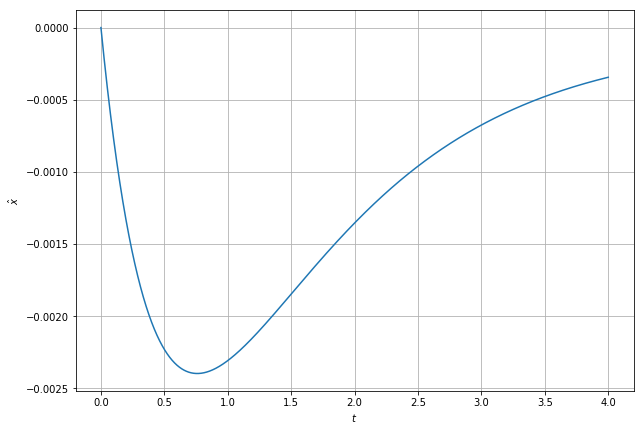

In [129]:
plt.figure(figsize=(10,7))
plt.plot(t, x_opt)
plt.grid()
plt.xlabel('$t$')
plt.ylabel('$\hat x$')
plt.show()